In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/catalog_dataset.csv')
df.describe(include='all')

,name,cloudplatform,nooflabs,lastprovisiondate,category,createdon,comments
count,1598,1598,1369.000000,1369,1598,1598,1598
unique,1588,8,NaN,1369,3,1588,2
top,aws.lab.Ubuntu.Desktop.TensorFlow,AMAZON,NaN,2023-02-02 13:28:43.114 +0530,RESOURCE_PROVISIONING,2018-03-09 18:35:46.183 +0530,Provisioned
freq,2,833,NaN,1,1396,2,1369
mean,NaN,NaN,1055.231556,NaN,NaN,NaN,NaN
std,NaN,NaN,12961.164481,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,24.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,88.000000,NaN,NaN,NaN,NaN


In [ ]:
df['cloudplatform'].value_counts()

#Catalog Summary


<table>
<tr><th>AMAZON</th><td>833</td></tr>
<tr><th>MICROSOFT_CSP</th><td>549</td></tr>
<tr><th>MICROSOFT_EA</th><td>186</td></tr>
<tr><th>CDH</th><td>11</td></tr>
<tr><th>SHARED_SERVER</th><td>11</td></tr>
<tr><th>EQUINIX_METAL</th><td>3</td></tr>
<tr><th>GCP</th><td>3</td></tr>
<tr><th>OPENSTACK</th><td>2</td></tr>
<tr><th>Total</th><td>1598</td></tr>
</table>

1. Total Number of catalog : 1598
2. No of platform supported : 8
3. Top used catalog is 'AMAZON'
4. Highest Number of catalogs (833) belongs to AMAZON


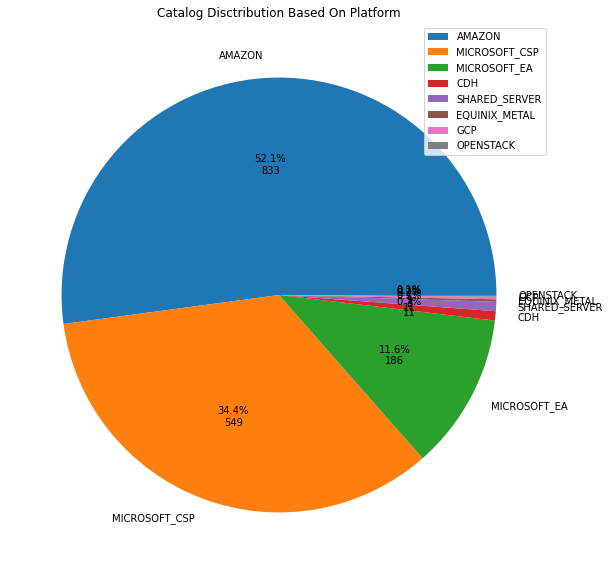

In [439]:
total = df['cloudplatform'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

x= df['cloudplatform'].value_counts();
plt.figure(figsize=(20,10))
plt.pie(x,labels=x.keys(),autopct=fmt);
plt.legend(loc='upper right');
plt.title('Catalog Disctribution Based On Platform');

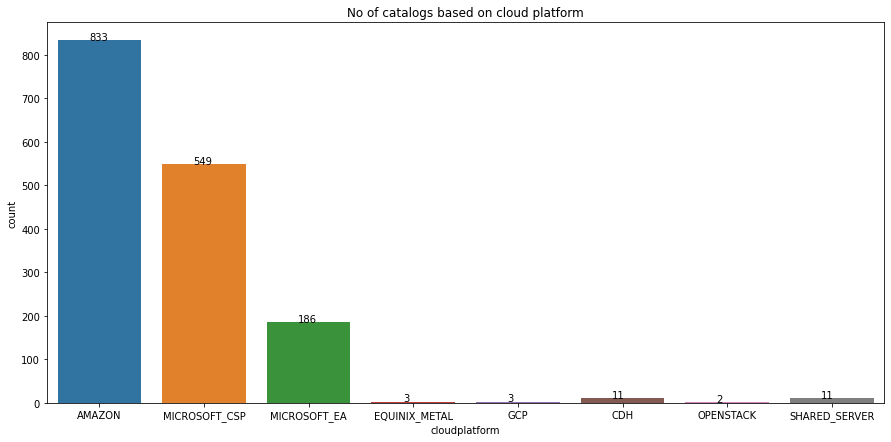

In [438]:
plt.figure(figsize=(15,7))
plt.title("No of catalogs based on cloud platform")
ax=sns.countplot(data= df, x= 'cloudplatform');
for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.3, p.get_height()+0.01))

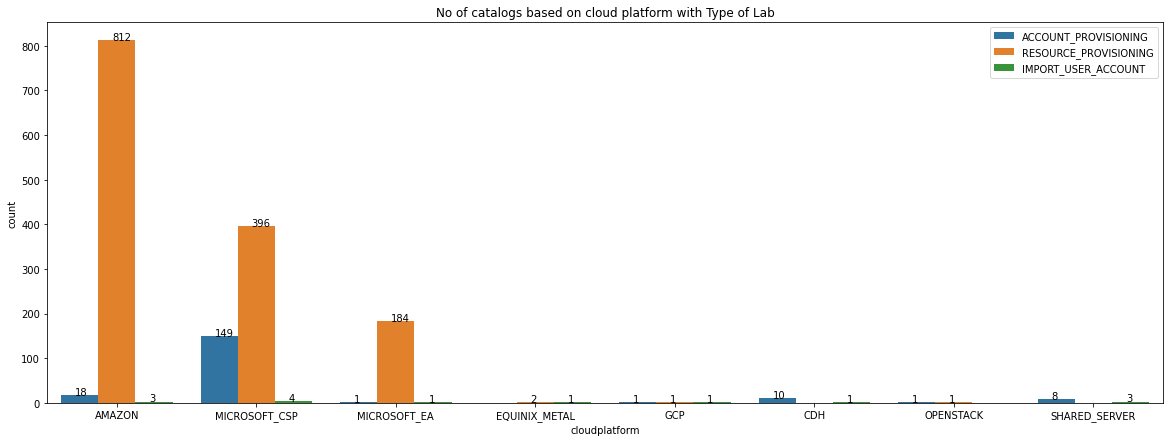

In [4]:
plt.figure(figsize=(20,7))
plt.title("No of catalogs based on cloud platform with Type of Lab")
ax=sns.countplot(data= df, x= 'cloudplatform',hue='category');

for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.1, p.get_height()+0.01))

plt.legend(loc='upper right');

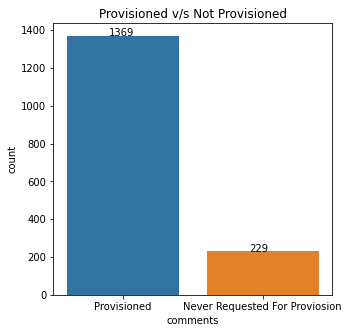

<Figure size 432x288 with 0 Axes>

In [434]:


plt.figure(figsize=(5,5))
plt.title("Provisioned v/s Not Provisioned")
ax=sns.countplot(data = df,x='comments')

for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.3, p.get_height()+0.01))

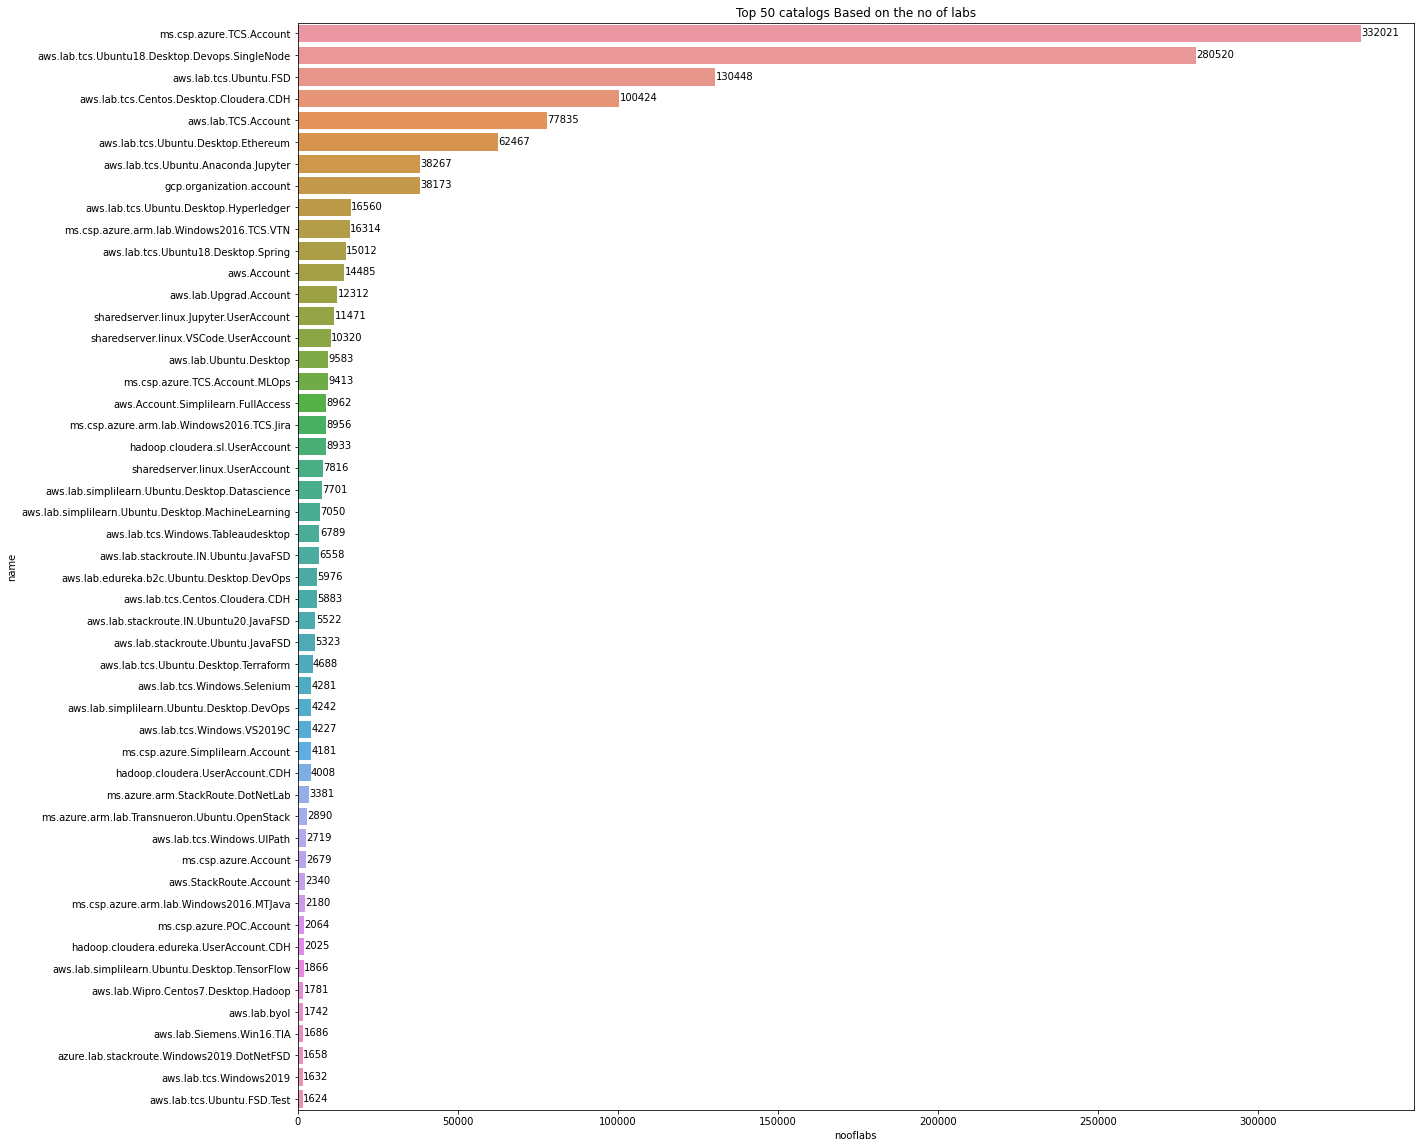

In [15]:
data = df[['name','nooflabs']].sort_values(by=['nooflabs'],ascending=False).copy()
x =data[:50]
plt.figure(figsize=(20,20))
plt.title("Top 50 catalogs Based on the no of labs")
ax=sns.barplot(data=x,x='nooflabs',y='name');
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+100,p.get_y()+0.5))